# <center> Проект: Анализ резюме из HeadHunter

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

hhdb = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
display(hhdb.head(14))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
5,"Мужчина , 29 лет , родился 5 октября 1989",25000 руб.,Технический специалист,"Старый Оскол , не готов к переезду , не готов ...",полная занятость,"полный день, сменный график",Опыт работы 9 лет 9 месяцев Технический специ...,Комбинат хлебопродуктов Старооскольский,Слесарь КИПиА,Неоконченное высшее образование 2013 Воронежс...,22.04.2019 15:59,Имеется собственный автомобиль
6,"Мужчина , 46 лет , родился 19 сентября 1972",250000 руб.,Руководитель ИТ-проектов,"Москва , не готов к переезду , готов к редким ...",полная занятость,полный день,Опыт работы 22 года 9 месяцев Руководитель ИТ...,"СИБИНТЕК, ООО ИК",Менеджер (Руководитель ИТ-проектов),Высшее образование 2008 ФГОУ ВПО «Уральская ак...,25.04.2019 22:48,Не указано
7,"Мужчина , 29 лет , родился 9 июля 1989",70000 руб.,Инженер АСУ ТП,"Москва , м. Бульвар Рокоссовского , готов к п...",полная занятость,полный день,Опыт работы 3 года 11 месяцев Декабрь 2016 — ...,ФМ-инжиниринг,Инженер АСУ ТП,Высшее образование 2014 Белорусская Государств...,07.05.2019 17:59,Не указано
8,"Мужчина , 29 лет , родился 11 июля 1989",65000 руб.,Ревизор,"Москва , м. Шоссе Энтузиастов , готов к перее...",полная занятость,полный день,Опыт работы 8 лет 9 месяцев Декабрь 2016 — по...,ФГБУ РСВО,Старший специалист,Неоконченное высшее образование 2020 Московск...,11.04.2019 11:08,Имеется собственный автомобиль
9,"Мужчина , 34 года , родился 26 мая 1984",55000 руб.,"Менеджер по работе с клиентами, Pre-sale менед...","Москва , м. Теплый Стан , не готов к переезду...",полная занятость,полный день,Опыт работы 16 лет 6 месяцев Июнь 2018 — по н...,"ООО ""Мираском""",Специалист отдела ИТ,Высшее образование 2007 Московский государств...,19.04.2019 11:39,Имеется собственный автомобиль


In [2]:
#ваш код здесь
import re
experience = pd.DataFrame()

# Паттерны для поиска опыта работы в тексте
years_pattern = r'(\d+) (?:лет|года|год)'
months_pattern = r'(\d+) (?:месяцев|месяца|месяц)'

# Применение паттернов к DataFrame
experience['лет'] = hhdb['Опыт работы'].apply(lambda x: re.search(years_pattern, ' '.join(str(x).split()[:4])).group(1) 
                                              if re.search(years_pattern, ' '.join(str(x).split()[:4])) else None)
experience['месяцев'] = hhdb['Опыт работы'].apply(lambda x: re.search(months_pattern, ' '.join(str(x).split()[:6])).group(1) 
                                                  if re.search(months_pattern, ' '.join(str(x).split()[:6])) else None)

experience = experience.astype(float)
print("ВИзуально проверяем")      
print(experience)

ВИзуально проверяем
        лет  месяцев
0      16.0     10.0
1      19.0      5.0
2      10.0      3.0
3      18.0      9.0
4       5.0      7.0
...     ...      ...
44739   7.0      7.0
44740   7.0      NaN
44741  21.0      5.0
44742   3.0     10.0
44743  15.0     10.0

[44744 rows x 2 columns]


In [3]:
# Функция для проверки, является ли значение числом
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
# Фильтруем строки, где значения в столбце 'Values' не являются числами
target_column = 'лет'
experience = experience[experience[target_column].apply(is_numeric)]
target_column = 'месяцев'
experience = experience[experience[target_column].apply(is_numeric)]

# Заданное уникальное значение
specified_value = 53
# Доля указанного уникального значения
share = (experience['лет'] == specified_value).sum() / len(experience)
print(f"Доля уникального значения {specified_value}: {share:.2%}")
# количество указанного уникального значения
share = (experience['лет'] == specified_value).sum()
print(f"количество указанного уникального значения {specified_value}: {share}")

Доля уникального значения 53: 0.00%
количество указанного уникального значения 53: 0


In [4]:
# Фильтрация строк, где значение по колонке "лет" равно NaN
nan_rows = experience.loc[experience['лет'].isna()]
# Создание нового DataFrame с сохранением индексов
nan_df = pd.DataFrame(nan_rows)
#смотримм соотношение
mon_only_df = pd.DataFrame ({'доля': nan_df['месяцев'].value_counts(normalize=True, dropna=False),
'колличество': nan_df['месяцев'].value_counts(dropna=False)})
display(mon_only_df)
print("предпологаем что можно удалить резюме тез кто да же не прошщёл испытательный срок \n т.е. менее трёх месяцев")

,доля,колличество
месяцев,,
9.0,0.113059,187
11.0,0.111850,185
8.0,0.105804,175
NaN,0.102781,170
6.0,0.092503,153
7.0,0.091898,152
10.0,0.091294,151
5.0,0.085248,141
4.0,0.081620,135


предпологаем что можно удалить резюме тез кто да же не прошщёл испытательный срок 
 т.е. менее трёх месяцев


In [5]:
# Создаём фильтр для получения строк в еоторых есть только данные по месяцам
filtr_experience = experience[(experience['лет'].isna()) | (experience['лет'] == 0)]

#создаём Дата Фрейм с долей и количеством каждого МЕСЯЦА
mon_df = pd.DataFrame ({'доля': filtr_experience['месяцев'].value_counts(normalize=True, dropna=False),
'колличество': filtr_experience['месяцев'].value_counts(dropna=False)})

#Сортируем по колличественному признаку
mon_df.sort_values(by='колличество', ascending=True, inplace=True)

#Создаём накопительный признак из доли
mon_df['Сумма_предыдущих долей'] = mon_df['доля'].cumsum() *100 

print("Статистика по месяцам")
print(mon_df)
# Необходимости в исключении выбросов нет
print("Исключаем строки со сроком работы з и менн месяца \n предполагая что человек не прошёл испытательный и вообще не имеет опыт работы")
experience = experience[~((experience['лет'].isna()) & (experience['месяцев'] < 4))]

Статистика по месяцам
             доля  колличество  Сумма_предыдущих долей
месяцев                                               
1.0      0.012696           21                1.269649
2.0      0.044135           73                5.683192
3.0      0.067110          111               12.394196
4.0      0.081620          135               20.556227
5.0      0.085248          141               29.081016
10.0     0.091294          151               38.210399
7.0      0.091898          152               47.400242
6.0      0.092503          153               56.650544
NaN      0.102781          170               66.928658
8.0      0.105804          175               77.509069
11.0     0.111850          185               88.694075
9.0      0.113059          187              100.000000
Исключаем строки со сроком работы з и менн месяца 
 предполагая что человек не прошёл испытательный и вообще не имеет опыт работы


In [7]:
#создаём Дата Фрейм с долей и количеством каждого года
year_df = pd.DataFrame ({'доля': experience['лет'].value_counts(normalize=True, dropna=False),
'колличество': experience['лет'].value_counts(dropna=False)})

year_df.sort_values(by='колличество', ascending=True, inplace=True) #Сортируем по колличественному признаку
year_df.drop(99.0, inplace=True)                                    # Удаляем заведомо неверную запись
year_df.drop(np.nan, inplace=True)                                  # Удаляем заведомо неверную запись

#Создаём накопительный признак из доли каждого признака
year_df['Сумма_предыдущих долей'] = year_df['доля'].cumsum() *100         
print(year_df)

# Фильтрация по значениям в столбце. применяем метод трёх сигм, года которые можно исключить
print("применяем метод трёх сигм, года которые составляют менее 0,27% можно исключить")
year_to_remove = year_df[year_df['Сумма_предыдущих долей'] < 0.27].index.tolist()

# Добавляем в список выбросов заведомо неверную запись
year_to_remove.append(99.0)
# Вывод списка индексов (колличества лет которые можно исключить)
print(year_to_remove)



          доля  колличество  Сумма_предыдущих долей
лет                                                
51.0  0.000022            1                0.002245
55.0  0.000022            1                0.004490
54.0  0.000022            1                0.006736
48.0  0.000045            2                0.011226
47.0  0.000045            2                0.015717
44.0  0.000045            2                0.020207
46.0  0.000067            3                0.026943
43.0  0.000090            4                0.035924
45.0  0.000135            6                0.049395
42.0  0.000180            8                0.067357
41.0  0.000247           11                0.092054
40.0  0.000314           14                0.123487
39.0  0.000404           18                0.163901
38.0  0.000561           25                0.220032
37.0  0.000763           34                0.296369
36.0  0.000786           35                0.374952
35.0  0.001100           49                0.484968
34.0  0.0011

In [8]:
# Удаляем записи в которых года определены как выбросы
experience = experience[~experience['лет'].isin(year_to_remove)]                                 

Доля нулевых значений =  0.0


'Медеана по общему колличествк месяцев работы = '

100.0

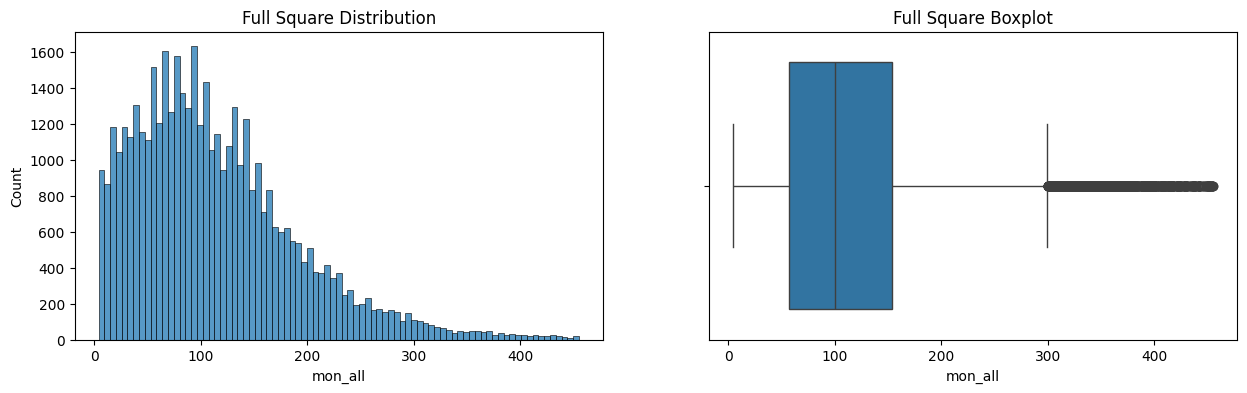

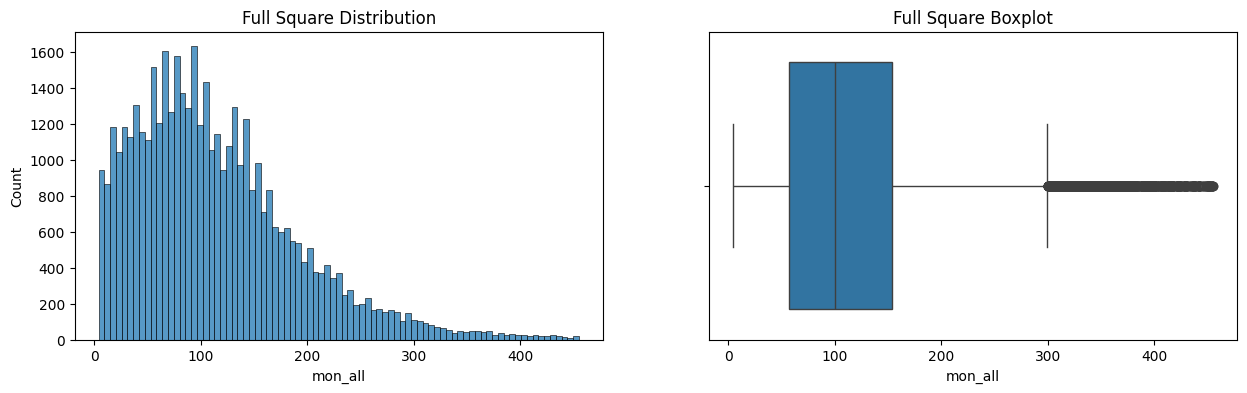

In [13]:
# Создаём колонку с значением месяцев
# Вычисляем значение месяцев учитывая что данные могут быть NaN
experience["mon_all"] = (experience['лет'].fillna(0) * 12 + experience['месяцев'].fillna(0)).astype(int)

experience = experience.loc[experience["mon_all"] != 0]


display("Медеана по общему колличествк месяцев работы = ", experience["mon_all"].median())

#Визуализируем Итоговые данные по заданию
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=experience, x='mon_all', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=experience, x='mon_all', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');
